In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Load Data

In [2]:
label_names = {0:'Negative', 1:'Positive'}

In [3]:
x_train = np.load('../data/wall_cracks.npy') # run data producer to create npy files
y_train = np.load('../data/data-labels.npy') # run data producer to create npy files


In [4]:
x_train_shape = x_train.shape
x_train_shape

(10357, 64, 64, 1)

In [5]:
# plot a batch of images 
def show_batch(image_batch, label_batch, cols=5, batch_size=25, reshape=False):
    
    plt.figure(figsize=(20,20))
    for n in range(batch_size):
        ax = plt.subplot(batch_size//cols,cols,n+1)
        image_batch_reshape = image_batch[n]
        if reshape:
            image_batch_reshape = np.reshape(image_batch_reshape, x_train_shape[1:])
            
        plt.imshow(image_batch_reshape[:,:,0], cmap='gray')
        plt.title(label_names[label_batch[n]])
        plt.axis('off')


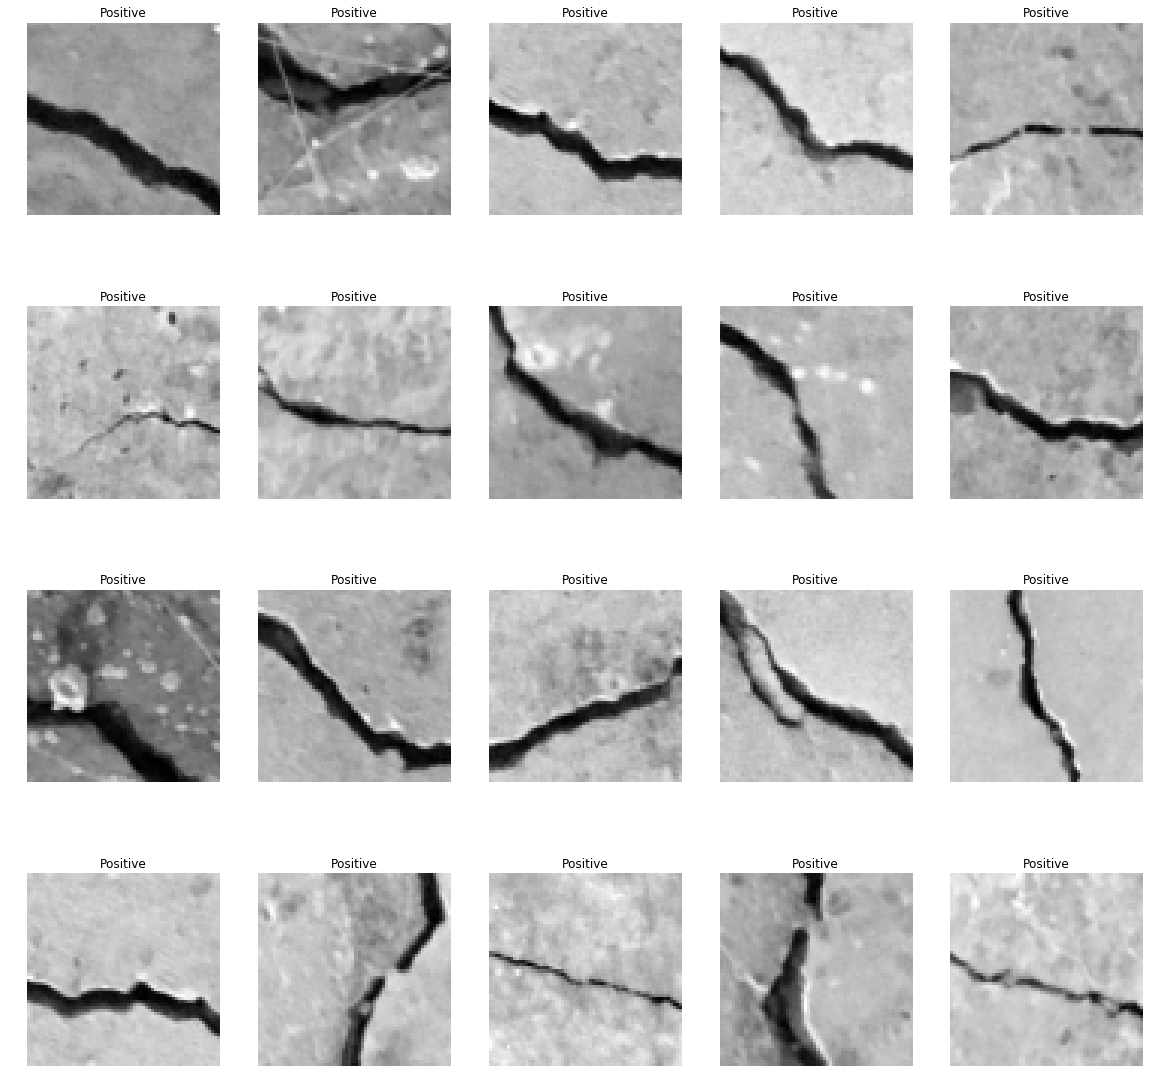

In [7]:
n = 20
show_batch(x_train[y_train==1][:n], y_train[y_train==1][:n], batch_size=n)

In [8]:
# reshape images to a vector of 4096=64x64
x_train_reshaped = np.reshape(x_train, (x_train_shape[0], np.prod(x_train_shape[1:])) )
x_train_reshaped.shape

(10357, 4096)

### Plot data

In [9]:
from sklearn.manifold import TSNE
import time
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

def plot_tsne(X,labels, n_sne=5000):
    # T-SNE Implementation

    print(x_train_reshaped.shape[0])
    rndperm = np.random.permutation(X.shape[0])
    print(n_sne)

    t0 = time.time()
    tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300, random_state=42)
    X_reduced_tsne = tsne.fit_transform(X[rndperm[:n_sne]])
    t1 = time.time()
    print("T-SNE took {:.2} s".format(t1 - t0))
    
    trace1 = go.Scatter3d(
        x=X_reduced_tsne[:,0],
        y=X_reduced_tsne[:,1],
        z=X_reduced_tsne[:,2],
        mode='markers',
        marker=dict(
            size=5,
            color=labels[rndperm[:n_sne]], # set color to an array/list of desired values
            colorscale=[[0.0,'#108785'], [1.0,'#7a260f']], #'Viridis',   # choose a colorscale
            opacity=.8

            )
    )

    data = [trace1]
    layout = go.Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        )
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='3d-scatter-colorscale')
    
    return X_reduced_tsne

# plot raw data on a 3-D plane using T-SNE
X_reduced_tsne = plot_tsne(x_train_reshaped,y_train, n_sne=5000)

10357
5000
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 1.850s...
[t-SNE] Computed neighbors for 5000 samples in 171.774s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 1.410775
[t-SNE] KL divergence after 250 iterations with early exaggeration: 108.888954
[t-SNE] KL divergence after 300 iterations: 4.760206
T-SNE took 2.1e+02 s


## Data Augmentation

In [14]:
from imblearn.over_sampling import SMOTE
seed = 5
smote = SMOTE(sampling_strategy='auto', random_state=seed,k_neighbors=7)
x_train_smote, y_train_smote = smote.fit_sample(x_train_reshaped, y_train)

In [15]:
# plot the new oversampled dataset (smote methode) on a 3-D plane using T-SNE
X_reduced_tsne_smote = plot_tsne(x_train_smote, y_train_smote, n_sne=5000)

10357
5000
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 1.025s...
[t-SNE] Computed neighbors for 5000 samples in 161.512s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.035302
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.330811
[t-SNE] KL divergence after 300 iterations: 2.535212
T-SNE took 2e+02 s


#### BorderlineSMOTE

SMOTE with borderline makes better new samples by avoiding the dangerous minority examples located near to the borderline and oversamples those are far away from it. The so-callled "safe" examples  

In [16]:
from imblearn.over_sampling import BorderlineSMOTE

smote_borderline = BorderlineSMOTE(random_state=seed)
x_train_smote_borderline, y_train_smote_borderline = smote_borderline.fit_sample(x_train_reshaped, y_train)


In [17]:
# plot the new oversampled dataset (smote with borderline methode) on a 3-D plane using T-SNE
X_reduced_tsne_smote_borderline = plot_tsne(x_train_smote_borderline, y_train_smote_borderline, n_sne=5000)

10357
5000
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 1.289s...
[t-SNE] Computed neighbors for 5000 samples in 147.113s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.086199
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.311127
[t-SNE] KL divergence after 300 iterations: 2.239221
T-SNE took 1.9e+02 s


In [19]:
# get some random generated images
idx_random = np.arange(len(y_train_smote_borderline[y_train_smote_borderline==1]))
np.random.shuffle(idx_random)
x_train_smote_borderline.shape

(20252, 4096)

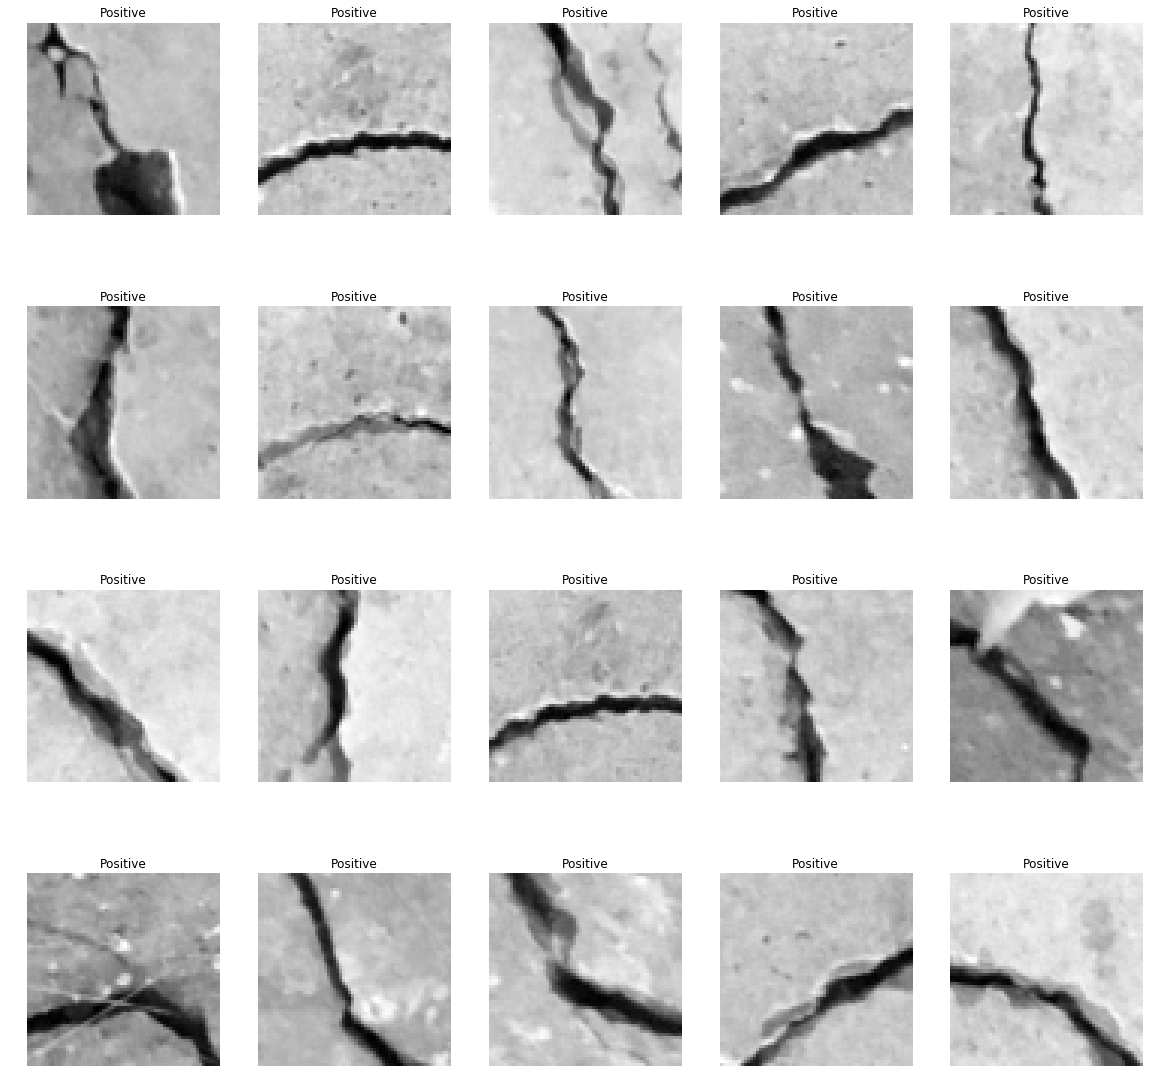

In [20]:
# plot n random image generated by smote with borderline
n = 20
show_batch(x_train_smote_borderline[y_train_smote_borderline==1][idx_random[:n]], y_train_smote_borderline[y_train_smote_borderline==1][idx_random[:n]], cols=5, batch_size=n, reshape=True)

### Save the oversampled data 

In [21]:
import os
import imageio
def save_images(images,labels, path='../data/', algo_name='smote'):
    path += algo_name
    if not os.path.exists(path):
        os.makedirs(path)  
    if not os.path.exists("{}/{}".format(path,label_names[1])):
        os.makedirs("{}/{}".format(path,label_names[1]))
    i = 0
    
    for image,label in zip(images,labels):
        if(label == 1):
            i+=1
            image_reshaped = np.reshape(image, x_train_shape[1:3])
            file_path = "{}/{}/{}_{}.jpg".format(path,label_names[label],i, algo_name)
            imageio.imwrite(file_path, image_reshaped)

    

In [22]:
t0 = time.time()
save_images(x_train_smote_borderline, y_train_smote_borderline, path='../data/', algo_name='smote_borderline')
print("Saving images took {:.2} s".format( time.time() - t0))


Lossy conversion from float32 to uint8. Range [-0.540351152420044, 1.341928482055664]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5784223079681396, 1.3855509757995605]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5269141793251038, 0.9223728775978088]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6487796902656555, 0.8028827905654907]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5766615271568298, 1.1822435855865479]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.33862537145614624, 0.8401237726211548]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.7245919704437256, 1.3999013

Lossy conversion from float32 to uint8. Range [-0.19353918731212616, 0.7796913981437683]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5793578028678894, 0.9025449156761169]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5255777835845947, 1.1220998764038086]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6563928723335266, 0.8896247148513794]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6246274709701538, 0.9328341484069824]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5472897291183472, 0.9029702544212341]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6522971987724304, 0.90974

Lossy conversion from float32 to uint8. Range [-0.37007936835289, 1.0673259496688843]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5437108874320984, 0.8972941637039185]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5629773736000061, 0.7607551217079163]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6081796884536743, 1.281514048576355]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5630027651786804, 0.9154706001281738]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6692084074020386, 0.9913162589073181]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3101951479911804, 0.861452698

Lossy conversion from float32 to uint8. Range [-0.5492731928825378, 0.9557086825370789]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5972914695739746, 0.9225220680236816]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5798588395118713, 1.0483500957489014]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.559788167476654, 0.9078959226608276]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.515190839767456, 0.9433797001838684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5663552284240723, 0.8209576606750488]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5162396430969238, 1.21049308

Lossy conversion from float32 to uint8. Range [-0.5461063981056213, 0.8109646439552307]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4506625831127167, 1.153098702430725]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6009525060653687, 1.0997477769851685]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6357775330543518, 1.0429929494857788]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.632015585899353, 1.0938352346420288]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6693018078804016, 0.860771119594574]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6167577505111694, 1.354059219

Lossy conversion from float32 to uint8. Range [-0.46907562017440796, 0.8587705492973328]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.41731250286102295, 0.7784888744354248]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.45250213146209717, 1.1197245121002197]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5479897260665894, 1.3059544563293457]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5450933575630188, 0.7822595834732056]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.511390209197998, 0.9980120658874512]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.35305505990982056, 1.069

Lossy conversion from float32 to uint8. Range [-0.536045491695404, 0.7595389485359192]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.2883239984512329, 0.9007007479667664]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4016178846359253, 0.7961971759796143]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.18723325431346893, 0.8092200756072998]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4843205511569977, 0.9403917193412781]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5237990021705627, 0.9841526746749878]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5972346067428589, 0.694884

Lossy conversion from float32 to uint8. Range [-0.5556038618087769, 0.8642596006393433]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5366342067718506, 0.9787646532058716]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3439205288887024, 0.8812869191169739]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.625912070274353, 0.8430183529853821]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3248631954193115, 0.910295844078064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5055425763130188, 0.8754276037216187]. Convert image to uint8 p

Lossy conversion from float32 to uint8. Range [-0.5858710408210754, 0.7659684419631958]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5622711777687073, 0.7307435274124146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5228041410446167, 1.1942627429962158]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5615835189819336, 1.0631256103515625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.43263885378837585, 0.8549622893333435]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.43577176332473755, 0.922903835773468]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5748024582862854, 0.91440

Lossy conversion from float32 to uint8. Range [-0.5241114497184753, 1.5523927211761475]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4752446711063385, 0.7377389073371887]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3579482138156891, 0.8476115465164185]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.1981486976146698, 0.8464411497116089]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.46963024139404297, 0.9154502749443054]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3148208558559418, 0.6889570355415344]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5153932571411133, 0.87466

Lossy conversion from float32 to uint8. Range [-0.001569017767906189, 0.739674985408783]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5242776274681091, 0.8617377281188965]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5003390908241272, 0.9094477891921997]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.49393996596336365, 0.8671546578407288]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.16016024351119995, 0.9043588042259216]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.15534597635269165, 0.8225513696670532]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3740144968032837, 0.89

Lossy conversion from float32 to uint8. Range [-0.5693397521972656, 0.824432909488678]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5616226196289062, 0.933676540851593]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.2711438536643982, 0.956883430480957]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4423753023147583, 1.1253323554992676]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.49448809027671814, 0.7655982971191406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3849518299102783, 1.0537452697753906]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5360324382781982, 0.79695987

Lossy conversion from float32 to uint8. Range [-0.6527424454689026, 1.1408296823501587]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5856895446777344, 1.1566295623779297]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5330386161804199, 0.8428488373756409]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3650680184364319, 0.6837923526763916]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5294908881187439, 1.131655216217041]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5290958881378174, 1.0451756715774536]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5673290491104126, 0.7357773

Lossy conversion from float32 to uint8. Range [-0.5426670908927917, 0.9591199159622192]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.609488308429718, 1.1206620931625366]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5713760852813721, 0.8182656764984131]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5051864385604858, 0.7834985852241516]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5156606435775757, 1.012169599533081]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5162643194198608, 0.8869330286979675]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5508632063865662, 0.82734936

Lossy conversion from float32 to uint8. Range [-0.5247616767883301, 1.1130534410476685]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3982751667499542, 0.9806988835334778]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5040125846862793, 1.0154979228973389]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.1354053020477295, 0.8996132612228394]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5409480929374695, 0.8726440072059631]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5609668493270874, 0.7037388682365417]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5497246980667114, 1.035407

Lossy conversion from float32 to uint8. Range [-0.628669023513794, 0.9170515537261963]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5734224319458008, 0.783618688583374]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.49713096022605896, 0.8903914093971252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5558741092681885, 0.695639967918396]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4767918884754181, 0.9295699596405029]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3603168725967407, 1.131994366645813]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5356047749519348, 0.886212229

Lossy conversion from float32 to uint8. Range [-0.4828210175037384, 1.0161900520324707]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.43893828988075256, 0.9561601877212524]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5131170749664307, 0.8974101543426514]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4987422525882721, 0.946078360080719]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.49193477630615234, 1.2550207376480103]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3890363276004791, 0.9969669580459595]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5641937851905823, 0.75970

Lossy conversion from float32 to uint8. Range [-0.5422152876853943, 0.9733728170394897]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5012715458869934, 0.8908148407936096]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4647829830646515, 1.0531996488571167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6232448816299438, 0.8987327814102173]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.491630882024765, 0.8869847059249878]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5185331702232361, 0.793006956577301]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5362120866775513, 1.02587008

Lossy conversion from float32 to uint8. Range [-0.5408859252929688, 0.7682216167449951]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5976851582527161, 0.7885459661483765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5110439658164978, 0.7516157627105713]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.36197352409362793, 1.1275447607040405]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5550064444541931, 1.0166336297988892]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5582018494606018, 1.1471161842346191]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.548856258392334, 0.824896

Lossy conversion from float32 to uint8. Range [-0.5402033925056458, 0.7088081240653992]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4471461772918701, 0.8639513254165649]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.503818690776825, 0.9182610511779785]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.2405579686164856, 0.7807230353355408]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5021090507507324, 0.7758264541625977]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.44623440504074097, 0.9143766164779663]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4479692280292511, 1.033398

Lossy conversion from float32 to uint8. Range [-0.24868066608905792, 0.8462569713592529]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3188502788543701, 1.0896555185317993]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5465442538261414, 0.810728907585144]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5242435932159424, 0.8679850101470947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6362398862838745, 0.8763408660888672]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.25081896781921387, 0.8294227123260498]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.26612183451652527, 0.8573

Lossy conversion from float32 to uint8. Range [-0.48652979731559753, 0.8072823882102966]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3776644170284271, 1.2113823890686035]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.477317750453949, 1.2763302326202393]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.2737336754798889, 0.9033511281013489]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.11879289150238037, 0.8643176555633545]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.27670273184776306, 0.8294732570648193]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5651886463165283, 0.8308

Lossy conversion from float32 to uint8. Range [-0.5224568247795105, 1.1124788522720337]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5811551809310913, 1.1342412233352661]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.48889222741127014, 0.87319016456604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5602638721466064, 0.7194517850875854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5103892087936401, 0.8715562224388123]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5127201676368713, 0.7265029549598694]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.2208302915096283, 0.8579258

Lossy conversion from float32 to uint8. Range [-0.5381602048873901, 1.706390619277954]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.27528756856918335, 0.8025975823402405]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5303184390068054, 0.87115877866745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4787294864654541, 0.9235794544219971]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.2795133888721466, 0.8770183324813843]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3693559169769287, 0.8102608919143677]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5230266451835632, 1.00699222

Lossy conversion from float32 to uint8. Range [-0.5817989110946655, 0.7322732210159302]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4827771782875061, 0.9440695643424988]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5605942606925964, 0.8904489874839783]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.44550976157188416, 0.7755120396614075]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5642068386077881, 1.0214128494262695]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5219874382019043, 0.9115426540374756]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4313017427921295, 1.09266

Lossy conversion from float32 to uint8. Range [-0.5122261643409729, 1.1074950695037842]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.24266305565834045, 0.7088984847068787]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5647384524345398, 0.8953922986984253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5485528111457825, 0.7674484252929688]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5604487657546997, 0.7074345350265503]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6150385141372681, 0.9099809527397156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5555748343467712, 0.74590

Lossy conversion from float32 to uint8. Range [-0.5325864553451538, 1.0113325119018555]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.484969824552536, 1.093775749206543]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4925241768360138, 1.0860177278518677]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6130871772766113, 0.6910140514373779]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.39629489183425903, 0.8554632067680359]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5551129579544067, 0.8567804098129272]. Convert image to uint8 

Lossy conversion from float32 to uint8. Range [-0.5412980914115906, 0.9378886818885803]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5304325222969055, 1.3055226802825928]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3689109981060028, 0.7487571239471436]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.48834022879600525, 0.7796886563301086]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3340085744857788, 1.1298840045928955]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.2119404524564743, 0.8476577997207642]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.2960202693939209, 0.87247

Lossy conversion from float32 to uint8. Range [-0.6181877255439758, 1.0197685956954956]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4717320203781128, 0.9371707439422607]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.35194534063339233, 0.675400972366333]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5730200409889221, 0.7457547783851624]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5528726577758789, 1.5977189540863037]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.48278534412384033, 1.2504801750183105]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.2551611065864563, 0.77788

Lossy conversion from float32 to uint8. Range [-0.38769301772117615, 1.214121699333191]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.47973009943962097, 0.7912366390228271]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.2816374897956848, 0.9517221450805664]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4425259530544281, 1.0356500148773193]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5312473177909851, 1.1550319194793701]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4954541325569153, 0.9999244213104248]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6501907110214233, 0.83936

Lossy conversion from float32 to uint8. Range [-0.5314375758171082, 0.7790266275405884]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.43644019961357117, 0.9025164842605591]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.467215895652771, 1.0046405792236328]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5936425924301147, 1.178243637084961]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.1994953453540802, 0.9167951345443726]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4691121578216553, 0.8788512945175171]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.48302531242370605, 0.861939

Lossy conversion from float32 to uint8. Range [-0.32781869173049927, 0.8293852210044861]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.54342120885849, 1.220947265625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4870222806930542, 0.8894493579864502]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.49637606739997864, 1.372470736503601]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3395794630050659, 0.7308034896850586]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.2558560371398926, 0.8242782354354858]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5076221227645874, 0.85177290439

Lossy conversion from float32 to uint8. Range [-0.5461277365684509, 0.7169296741485596]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.235633984208107, 0.7448864579200745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4098281264305115, 0.9265645742416382]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4646717309951782, 0.9398384094238281]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6734738349914551, 0.897031307220459]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5391279458999634, 0.8231121301651001]. Convert image to uint8 p

Lossy conversion from float32 to uint8. Range [-0.5425631999969482, 1.0406057834625244]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0009068995714187622, 0.7897844314575195]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6135112047195435, 0.8187904357910156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.25422030687332153, 0.7080347537994385]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4550606310367584, 0.9771962761878967]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.516615092754364, 0.7755813002586365]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3774286210536957, 0.947

Lossy conversion from float32 to uint8. Range [-0.19271650910377502, 0.7944414019584656]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5109394192695618, 1.0083224773406982]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3720768690109253, 0.765609622001648]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.551278829574585, 0.7265509963035583]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.523901104927063, 0.8031957149505615]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4525488615036011, 0.9321088790893555]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.47571244835853577, 0.7539571

Lossy conversion from float32 to uint8. Range [-0.5327304601669312, 0.8661082983016968]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4631011486053467, 0.9102213382720947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.7127018570899963, 1.3037104606628418]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4700565040111542, 0.9865268468856812]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.23182961344718933, 0.7765883207321167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5010393261909485, 0.8533984422683716]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4515738785266876, 1.08660

Lossy conversion from float32 to uint8. Range [-0.5559569001197815, 0.8339390754699707]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.29064181447029114, 0.7768226861953735]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.1653946340084076, 0.7299821376800537]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.24629051983356476, 0.9030504822731018]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5540719032287598, 0.7485960721969604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5018836259841919, 0.750190258026123]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5341582894325256, 0.71137

Lossy conversion from float32 to uint8. Range [-0.17144593596458435, 0.8118891716003418]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5431482195854187, 0.9785393476486206]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5299094915390015, 0.7947583198547363]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5352635383605957, 0.7954002022743225]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.560126006603241, 1.1052260398864746]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5752367973327637, 0.8682138919830322]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3543263077735901, 0.826484

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5525883436203003, 0.6964102983474731]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5707809925079346, 0.8376163840293884]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5743277072906494, 0.89594966173172]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.545556366443634, 0.8299209475517273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.49640801548957825, 0.7600101232528687]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5082401037216187, 0.9070628881454468]. Convert image to uint8 p

Lossy conversion from float32 to uint8. Range [-0.504584789276123, 0.9063750505447388]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.2540777921676636, 0.8088895082473755]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5221226215362549, 0.9065008163452148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5321244597434998, 0.8975748419761658]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5533987283706665, 0.8856146335601807]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.516191303730011, 0.7296475172042847]. Convert image to uint8 p

Lossy conversion from float32 to uint8. Range [-0.5236446857452393, 0.7158865928649902]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5368351936340332, 0.8601592779159546]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5261540412902832, 0.9144128561019897]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5637524127960205, 1.056886076927185]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5942968130111694, 0.8389420509338379]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5273698568344116, 0.7892575263977051]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5122639536857605, 0.8709585

Lossy conversion from float32 to uint8. Range [-0.35119491815567017, 0.8704589605331421]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5144413709640503, 0.8994159698486328]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5612178444862366, 0.8402808308601379]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.25641804933547974, 0.9807651042938232]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.43447181582450867, 0.9407386183738708]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5141549110412598, 0.8020515441894531]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.491935670375824, 1.0278

Lossy conversion from float32 to uint8. Range [-0.5804346203804016, 1.1313135623931885]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5515619516372681, 0.8743990659713745]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.454369455575943, 0.9814697504043579]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5544880628585815, 0.867235541343689]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5220479965209961, 1.0062249898910522]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.30664703249931335, 0.9434452056884766]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.37555328011512756, 1.218599

Lossy conversion from float32 to uint8. Range [-0.5465512871742249, 0.6956068873405457]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4948957860469818, 0.7746812105178833]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4233156442642212, 0.7311544418334961]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3001618981361389, 0.7940940260887146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5647174715995789, 1.3295490741729736]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5281989574432373, 0.7262725234031677]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5454358458518982, 1.076811

Lossy conversion from float32 to uint8. Range [-0.5214616656303406, 1.1699018478393555]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5610536336898804, 0.8491867780685425]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5479646921157837, 0.8465712666511536]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6373409628868103, 1.1196033954620361]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4244893789291382, 1.0236722230911255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5383066534996033, 0.8145179748535156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5422229766845703, 1.150098

Lossy conversion from float32 to uint8. Range [-0.5145007967948914, 1.0223973989486694]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4697663187980652, 0.9858567714691162]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.520566463470459, 0.8209343552589417]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.29528704285621643, 0.7540320158004761]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4531654417514801, 0.9763288497924805]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5748524069786072, 1.3567912578582764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.443937212228775, 0.9013607

Lossy conversion from float32 to uint8. Range [-0.5148299336433411, 1.063917875289917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5487383604049683, 0.7262053489685059]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5084657669067383, 1.1332221031188965]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5093031525611877, 0.8264404535293579]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5446882247924805, 0.7935897707939148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.49559369683265686, 0.7624205946922302]. Convert image to uint8

Lossy conversion from float32 to uint8. Range [-0.5847687721252441, 1.309914469718933]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.35091638565063477, 0.9405456781387329]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5565328598022461, 0.7245955467224121]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5381845235824585, 0.8371801972389221]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4751845598220825, 1.1173005104064941]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5432411432266235, 1.025813341140747]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5835894346237183, 1.1351281

Lossy conversion from float32 to uint8. Range [-0.34242334961891174, 0.7990139126777649]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.43769627809524536, 1.1925163269042969]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3003157079219818, 0.802653431892395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5243346691131592, 0.7825955748558044]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5268517732620239, 0.9126572608947754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.26573270559310913, 0.892616331577301]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5199658274650574, 0.79093

Lossy conversion from float32 to uint8. Range [-0.3881380558013916, 0.707614541053772]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.36706551909446716, 0.8699971437454224]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6226546764373779, 0.7734545469284058]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5456492304801941, 0.8951253890991211]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5281656980514526, 0.8753905296325684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.24891307950019836, 0.8312667608261108]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint

Lossy conversion from float32 to uint8. Range [-0.603253960609436, 0.8082295060157776]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5544753074645996, 0.8436914682388306]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5245903730392456, 0.7249060869216919]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.48672249913215637, 0.8130828142166138]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5263490676879883, 0.9899844527244568]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5735288858413696, 1.1474055051803589]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6091262102127075, 1.008290

Lossy conversion from float32 to uint8. Range [-0.3039640188217163, 0.9234912395477295]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5020645260810852, 0.8183040618896484]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5222344398498535, 0.8006340265274048]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5172497630119324, 0.7167481184005737]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5552340149879456, 0.7528114318847656]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4818820059299469, 0.8970289826393127]. Convert image to uint8

Lossy conversion from float32 to uint8. Range [-0.48889386653900146, 1.0381661653518677]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.25173163414001465, 0.9629436731338501]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4897127151489258, 0.8461148142814636]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.513285756111145, 0.8034477829933167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.041867196559906006, 0.7898582220077515]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5859020948410034, 1.0912100076675415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5221583843231201, 0.919

Lossy conversion from float32 to uint8. Range [-0.35791289806365967, 0.9182455539703369]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.20752784609794617, 0.8545236587524414]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.02929854393005371, 0.7601995468139648]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.14154869318008423, 0.8049643039703369]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5119267702102661, 0.8263155221939087]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.13826952874660492, 0.8827037811279297]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to 

Lossy conversion from float32 to uint8. Range [-0.5153557062149048, 0.9059913158416748]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5079404711723328, 0.8391069173812866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.20970427989959717, 0.8345410227775574]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4007636308670044, 1.09614896774292]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.45138585567474365, 0.8297173976898193]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5108765959739685, 0.8562641739845276]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.196199432015419, 0.8257409

Lossy conversion from float32 to uint8. Range [-0.4120929539203644, 1.0865728855133057]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5280747413635254, 0.7343499660491943]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.13194309175014496, 0.8058279156684875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.7185680270195007, 1.3960468769073486]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6074008345603943, 0.8695580959320068]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5366234183311462, 0.7449970245361328]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6231117248535156, 0.77391

Lossy conversion from float32 to uint8. Range [-0.5395311117172241, 0.7866794466972351]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.43545886874198914, 0.8935539126396179]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.2334149181842804, 0.914405345916748]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.26354333758354187, 0.7006051540374756]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5082513093948364, 0.752169132232666]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3707144260406494, 1.2276111841201782]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.20251771807670593, 0.84162

Lossy conversion from float32 to uint8. Range [-0.46886521577835083, 0.6899933218955994]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5357499718666077, 0.9395114779472351]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4914405643939972, 0.715904712677002]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5473180413246155, 0.7924184799194336]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5404915809631348, 0.743852972984314]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5089666843414307, 0.789520800113678]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5522459745407104, 0.76445925

Lossy conversion from float32 to uint8. Range [-0.4677429497241974, 0.9060116410255432]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5460281372070312, 0.8313283920288086]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.33980441093444824, 0.8291423916816711]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5786406397819519, 1.1524590253829956]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4910898208618164, 0.8015037178993225]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.554060161113739, 0.8501205444335938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5766696929931641, 1.102111

Lossy conversion from float32 to uint8. Range [-0.4566243886947632, 0.879569947719574]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.7023999094963074, 1.220368504524231]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.48599478602409363, 0.855806827545166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5466473698616028, 0.9798187017440796]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3520360589027405, 0.8623244762420654]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5536984205245972, 0.6906754970550537]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5377113223075867, 0.81192666

Lossy conversion from float32 to uint8. Range [-0.47276633977890015, 1.1365630626678467]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5151051878929138, 0.7725122570991516]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6285043358802795, 0.9354872703552246]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.2934504747390747, 0.7766419649124146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5478953719139099, 0.792658269405365]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.44821897149086, 0.9683585166931152]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4895453155040741, 0.90031814

Lossy conversion from float32 to uint8. Range [-0.07586157321929932, 0.773821234703064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.32577481865882874, 1.0513640642166138]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.46358758211135864, 0.8139892816543579]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.48210835456848145, 0.8806555867195129]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6193516850471497, 1.3008172512054443]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.44054582715034485, 1.2299246788024902]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3941534757614136, 0.90

Lossy conversion from float32 to uint8. Range [-0.4885866045951843, 1.1036581993103027]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5693197846412659, 0.8613462448120117]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4541648328304291, 0.9413872361183167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.42746514081954956, 1.1398319005966187]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5181378722190857, 0.8842414617538452]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.35475954413414, 0.9137946367263794]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5253903865814209, 0.8123941

Lossy conversion from float32 to uint8. Range [-0.5334242582321167, 0.8734942078590393]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.583330512046814, 0.8400446176528931]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.510870635509491, 1.0112090110778809]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5572451949119568, 0.7008005976676941]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.45518678426742554, 1.0777671337127686]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5678403973579407, 1.0062503814697266]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.561801552772522, 0.95548355

Lossy conversion from float32 to uint8. Range [-0.22095800936222076, 0.8614175915718079]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5532541871070862, 0.8853529095649719]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4304223656654358, 1.0236952304840088]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5745715498924255, 0.7579590082168579]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5158299207687378, 0.7135145664215088]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.32854413986206055, 0.7936619520187378]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5472233891487122, 0.7769

Lossy conversion from float32 to uint8. Range [-0.22038263082504272, 0.8648816347122192]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5035895705223083, 0.8269874453544617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5689065456390381, 1.0240083932876587]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.24237260222434998, 0.820198655128479]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.464896559715271, 0.8682557940483093]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5452291965484619, 0.8125939965248108]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5365153551101685, 0.988267

Lossy conversion from float32 to uint8. Range [-0.47804000973701477, 1.280312180519104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5434021353721619, 0.7043324112892151]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4898175001144409, 0.7144745588302612]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4902327060699463, 0.9748398661613464]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5368959903717041, 0.7946459650993347]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5508504509925842, 0.8373956084251404]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5048965811729431, 0.802791

Lossy conversion from float32 to uint8. Range [-0.4920777976512909, 0.7991076707839966]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.1848258674144745, 0.8034569025039673]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.571201503276825, 0.724539577960968]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4970000684261322, 1.0579630136489868]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5086085796356201, 0.8875730037689209]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.43596363067626953, 0.7887824773788452]. Convert image to uint8 

Lossy conversion from float32 to uint8. Range [-0.42046689987182617, 0.7276917695999146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.507932186126709, 0.7781999707221985]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3317835330963135, 0.9273481369018555]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5029810070991516, 1.1128861904144287]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6348519921302795, 1.1081441640853882]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.38014447689056396, 0.7349490523338318]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5324380397796631, 0.69617

Lossy conversion from float32 to uint8. Range [-0.5491366386413574, 0.8159772157669067]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5144127607345581, 1.4733608961105347]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.2514861524105072, 1.0115021467208862]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.06653344631195068, 0.813733696937561]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.2118903249502182, 0.7201075553894043]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4651574194431305, 0.9636130332946777]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.47653841972351074, 0.80693

Lossy conversion from float32 to uint8. Range [-0.45224156975746155, 0.764582633972168]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5139200687408447, 0.7110021114349365]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5319315195083618, 0.8468033075332642]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.37976253032684326, 0.7992639541625977]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.49637413024902344, 0.9800029993057251]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5267791152000427, 1.4443724155426025]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5046644806861877, 0.9616

Lossy conversion from float32 to uint8. Range [-0.5185677409172058, 0.739791750907898]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.11859327554702759, 0.9557649493217468]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5196974277496338, 0.7792064547538757]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5181090831756592, 0.9573095440864563]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4963074028491974, 0.942225456237793]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4905991852283478, 0.8436589241027832]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5000626444816589, 1.0631070

Lossy conversion from float32 to uint8. Range [-0.4624767005443573, 0.8676159381866455]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3944688141345978, 0.9811263680458069]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5481083393096924, 1.0767529010772705]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5649549961090088, 0.9277424812316895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.47096773982048035, 0.8284183144569397]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.53696608543396, 0.8322839140892029]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4815002381801605, 0.7278470

Lossy conversion from float32 to uint8. Range [-0.2359285056591034, 0.8067456483840942]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.22323131561279297, 0.9371957778930664]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5995677709579468, 0.8349801301956177]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5488539338111877, 0.7184150815010071]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5054580569267273, 0.7989850640296936]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5634515881538391, 0.8141093850135803]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.28608831763267517, 0.7926

Lossy conversion from float32 to uint8. Range [-0.6148148775100708, 1.0391368865966797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5205457210540771, 0.7339364290237427]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4867779612541199, 0.9509152173995972]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.2279522866010666, 0.8917231559753418]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.39006856083869934, 1.0799144506454468]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.0013132989406585693, 0.8640003800392151]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4928065240383148, 0.95

Lossy conversion from float32 to uint8. Range [-0.5149927139282227, 0.8463037014007568]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4282795190811157, 0.8668118119239807]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.561530590057373, 0.8406599760055542]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3455146253108978, 1.070941686630249]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5075987577438354, 1.1636784076690674]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5103895664215088, 1.0089441537857056]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.44662630558013916, 0.9217140

Lossy conversion from float32 to uint8. Range [-0.44834139943122864, 0.9643564224243164]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.42549484968185425, 0.8871084451675415]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5343472957611084, 0.915816605091095]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6323589086532593, 1.1294381618499756]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.2636551260948181, 0.8514335751533508]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.49284517765045166, 0.9029908180236816]. Convert image to uin

Lossy conversion from float32 to uint8. Range [-0.5230417847633362, 1.1861430406570435]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5574400424957275, 0.9455745220184326]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4755040407180786, 0.9937902688980103]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5200361013412476, 1.5095845460891724]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4778684675693512, 0.9359947443008423]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4428451955318451, 0.8517956137657166]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5540599226951599, 0.877838

Lossy conversion from float32 to uint8. Range [-0.5110893249511719, 1.1494495868682861]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5270344018936157, 1.4018467664718628]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.2771344780921936, 0.7710938453674316]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5045473575592041, 0.9886788129806519]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.25820183753967285, 0.9679139852523804]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5628539323806763, 0.7885069251060486]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5828873515129089, 0.73337

Lossy conversion from float32 to uint8. Range [-0.5679101943969727, 0.831713855266571]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5662983655929565, 1.1445634365081787]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.10666438937187195, 0.7914437055587769]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5797027349472046, 1.2611438035964966]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5136783719062805, 1.0653581619262695]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5451921820640564, 0.7867592573165894]. Convert image to uint8

Lossy conversion from float32 to uint8. Range [-0.40183255076408386, 0.6621623039245605]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4794262647628784, 0.9153072237968445]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5244625806808472, 0.8237335085868835]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.44416242837905884, 0.7758442163467407]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4936903417110443, 1.0811368227005005]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.20280343294143677, 0.8125325441360474]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5199780464172363, 0.956

Lossy conversion from float32 to uint8. Range [-0.64080411195755, 1.1448549032211304]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.42025667428970337, 0.8289240002632141]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5068756937980652, 0.8249971270561218]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4772718548774719, 0.8806470632553101]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5040470361709595, 0.7681825757026672]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5162867903709412, 0.7342389225959778]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.32182732224464417, 0.988914

Lossy conversion from float32 to uint8. Range [-0.16139423847198486, 0.766940176486969]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6105113625526428, 1.0540744066238403]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.521800696849823, 1.2285525798797607]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4182569086551666, 1.0379194021224976]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.49082908034324646, 0.8844685554504395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5086804628372192, 0.9543038606643677]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.2669079303741455, 0.990646

Lossy conversion from float32 to uint8. Range [-0.4568623900413513, 1.2004386186599731]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5350040793418884, 0.8557279706001282]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4873226284980774, 1.0597965717315674]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.29724031686782837, 0.9725666046142578]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5082640647888184, 1.0239629745483398]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.29314476251602173, 0.7002289295196533]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5664294362068176, 0.8211

Lossy conversion from float32 to uint8. Range [-0.47166383266448975, 0.8168961405754089]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.30743348598480225, 1.0254690647125244]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.49813827872276306, 0.8533545732498169]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5250833630561829, 0.9046326279640198]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5131033062934875, 0.7862420678138733]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5563018918037415, 0.8867098093032837]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5379649996757507, 0.870

Lossy conversion from float32 to uint8. Range [-0.5396779179573059, 0.7650277018547058]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5462942123413086, 0.8520532250404358]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.34776732325553894, 0.7671557664871216]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4926126301288605, 1.030670166015625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.18515102565288544, 0.9058676362037659]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.557440996170044, 0.9153839945793152]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.7219142913818359, 1.378239

Lossy conversion from float32 to uint8. Range [-0.47327104210853577, 0.9581162929534912]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.61818528175354, 1.047777771949768]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5240105986595154, 0.9958410263061523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4988369941711426, 0.9684162735939026]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.1592087596654892, 0.7574838995933533]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5219395160675049, 0.9002149701118469]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3743082880973816, 0.91187608

Lossy conversion from float32 to uint8. Range [-0.5223464369773865, 0.7881848812103271]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3978002369403839, 1.2257819175720215]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3442824184894562, 0.7913769483566284]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5566135048866272, 0.880487859249115]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.45291805267333984, 1.2266842126846313]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4873810410499573, 0.954475998878479]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.508505642414093, 1.02038371

Lossy conversion from float32 to uint8. Range [-0.45559024810791016, 0.8282231092453003]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3825998902320862, 0.8762409687042236]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4536455571651459, 0.9593303203582764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5688017010688782, 1.003718614578247]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5195420980453491, 0.8691402673721313]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5633843541145325, 0.7931746244430542]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5171091556549072, 0.932975

Lossy conversion from float32 to uint8. Range [-0.47649380564689636, 1.202579140663147]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5133748054504395, 1.287649154663086]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5806913375854492, 0.9311578273773193]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4268683195114136, 0.7894203662872314]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5724690556526184, 0.7665477991104126]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5072713494300842, 1.1331323385238647]. Convert image to uint8 

Lossy conversion from float32 to uint8. Range [-0.4597666263580322, 1.135980248451233]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3723388910293579, 1.2007815837860107]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5023395419120789, 0.8433384895324707]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5768138766288757, 0.8238962292671204]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5690371990203857, 1.017770767211914]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.421820729970932, 0.8185165524482727]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.7242776155471802, 1.106438159

Lossy conversion from float32 to uint8. Range [-0.522373378276825, 0.9675495624542236]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.503014087677002, 0.9707070589065552]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4785148799419403, 0.9431170225143433]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.514205276966095, 0.9411702156066895]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.48498597741127014, 1.248882532119751]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5187193155288696, 1.289487600326538]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.17869873344898224, 0.868607699

Lossy conversion from float32 to uint8. Range [-0.4544931948184967, 0.8402521014213562]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5299131274223328, 1.169325351715088]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4875619411468506, 0.9494934678077698]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4920445680618286, 0.6985845565795898]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.545697808265686, 0.8072777986526489]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6470067501068115, 0.8812883496284485]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3924204111099243, 0.83579981

Lossy conversion from float32 to uint8. Range [-0.47362375259399414, 0.936805009841919]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.46770256757736206, 0.9544969201087952]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5397931933403015, 1.2389050722122192]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.533197820186615, 0.834026575088501]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4639285206794739, 0.9816502332687378]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5328044891357422, 0.982100784778595]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4193369150161743, 0.86471426

Lossy conversion from float32 to uint8. Range [-0.49355587363243103, 0.7166500091552734]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.24203862249851227, 0.8276199102401733]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.25478464365005493, 0.7811658382415771]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.029544159770011902, 0.782816469669342]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.48480328917503357, 0.687086820602417]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3521105647087097, 0.8576459884643555]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5372116565704346, 0.74

Lossy conversion from float32 to uint8. Range [-0.38155651092529297, 0.7860968708992004]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.460966557264328, 0.9565784931182861]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.554958164691925, 0.872765302658081]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.47811052203178406, 0.795587956905365]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.48129796981811523, 0.9252616763114929]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.44130709767341614, 1.0090851783752441]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.17816123366355896, 0.95932

Lossy conversion from float32 to uint8. Range [-0.43917912244796753, 0.8317679762840271]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5223372578620911, 1.3064463138580322]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5083338022232056, 0.7597045302391052]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4683537781238556, 0.7984265685081482]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6026228666305542, 1.1799520254135132]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4972270131111145, 0.9870806932449341]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4527266323566437, 0.75790

Lossy conversion from float32 to uint8. Range [-0.5083355903625488, 0.7935446500778198]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5449428558349609, 1.0065526962280273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5020971894264221, 0.9908226728439331]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.49870675802230835, 0.7918944358825684]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5110384821891785, 1.099900722503662]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4535108506679535, 0.9552100300788879]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5160229206085205, 0.826644

Lossy conversion from float32 to uint8. Range [-0.5059186816215515, 0.7757319211959839]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.48651424050331116, 0.8358720541000366]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5413256883621216, 0.8003964424133301]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.47124940156936646, 0.9888643026351929]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4836256504058838, 0.9173787832260132]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.17929206788539886, 0.7840992212295532]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5476265549659729, 1.364

Lossy conversion from float32 to uint8. Range [-0.48491370677948, 0.7750914096832275]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.1725420355796814, 0.7911432385444641]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5341174602508545, 0.8478684425354004]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5803115963935852, 1.3017833232879639]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5452287793159485, 0.8231234550476074]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5075432062149048, 1.145379662513733]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5697668194770813, 1.360378980

Lossy conversion from float32 to uint8. Range [-0.42257964611053467, 0.8723364472389221]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5544273853302002, 0.9413068890571594]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.641633927822113, 0.9815405607223511]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5181870460510254, 0.9263617992401123]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5288681983947754, 0.79851895570755]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.500220537185669, 0.9230161309242249]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5753328800201416, 0.887712955

Lossy conversion from float32 to uint8. Range [-0.5539916753768921, 0.6953365206718445]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4910239279270172, 0.9206880331039429]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5067741274833679, 0.8793144226074219]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5370038747787476, 0.7698909044265747]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5567952394485474, 0.8349263072013855]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4673154652118683, 1.0853108167648315]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.46776944398880005, 0.79731

Lossy conversion from float32 to uint8. Range [-0.2302144467830658, 0.7622262239456177]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5539225339889526, 0.8536373376846313]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3060215711593628, 0.9458771347999573]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.47427210211753845, 0.9560085535049438]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.2706562280654907, 0.9089589715003967]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.47661128640174866, 0.8496411442756653]. Convert image to uin

Lossy conversion from float32 to uint8. Range [-0.5464120507240295, 0.8533657193183899]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5561918020248413, 1.0797061920166016]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5480886697769165, 0.7313118577003479]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.43201184272766113, 0.7876533269882202]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5936323404312134, 0.7791088223457336]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5555863380432129, 0.8451884984970093]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5001679062843323, 0.89106

Lossy conversion from float32 to uint8. Range [-0.52655428647995, 0.8778997659683228]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4529111981391907, 0.9034416675567627]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4861471951007843, 0.8216809034347534]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4085434675216675, 1.0634043216705322]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4506884515285492, 1.2065829038619995]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5024729371070862, 0.738817572593689]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 pr

Lossy conversion from float32 to uint8. Range [-0.06182326376438141, 0.8419131636619568]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.46286606788635254, 0.9634871482849121]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5177062153816223, 0.7319815158843994]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.47506147623062134, 0.9590432643890381]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5059121251106262, 1.1951394081115723]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5227882862091064, 0.7192413806915283]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.41917884349823, 1.17951

Lossy conversion from float32 to uint8. Range [-0.3688134551048279, 0.9679867029190063]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.2768491506576538, 1.0044300556182861]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4822845160961151, 0.7608656883239746]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.04294469952583313, 0.769382119178772]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.27722832560539246, 0.8665353655815125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.33472737669944763, 0.8942436575889587]. Convert image to uin

Lossy conversion from float32 to uint8. Range [-0.18788257241249084, 0.8094156980514526]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3496645390987396, 0.8825784921646118]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.48737889528274536, 1.1012015342712402]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6284368634223938, 0.8433438539505005]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.46992215514183044, 0.7819192409515381]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.49813753366470337, 1.2580535411834717]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5624540448188782, 0.85

Lossy conversion from float32 to uint8. Range [-0.6001649498939514, 0.8313543796539307]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.33947908878326416, 0.7835469245910645]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5548038482666016, 0.754088282585144]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4965840280056, 1.089621663093567]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6049244403839111, 1.115968942642212]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.19373540580272675, 0.8253456950187683]. Convert image to uint8 pri

Lossy conversion from float32 to uint8. Range [-0.5223451852798462, 1.0342445373535156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5395259857177734, 0.8188419938087463]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5036484599113464, 0.9586185216903687]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.44321200251579285, 0.8974890112876892]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5357425808906555, 0.7819039821624756]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5334551334381104, 0.8113064765930176]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5723548531532288, 0.76276

Lossy conversion from float32 to uint8. Range [-0.46983057260513306, 1.0961945056915283]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.46707797050476074, 1.0040427446365356]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5421231985092163, 1.3997523784637451]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5300143957138062, 0.7957800626754761]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5825130343437195, 0.8420648574829102]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5732579231262207, 0.9421802759170532]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.30156823992729187, 0.949

Lossy conversion from float32 to uint8. Range [-0.24137523770332336, 0.6745873093605042]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.47357431054115295, 0.8917583227157593]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.494679719209671, 0.8567878007888794]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5588706135749817, 0.9063764810562134]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.49523887038230896, 1.191450595855713]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5220404267311096, 0.9199638962745667]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5377361178398132, 0.95142

Lossy conversion from float32 to uint8. Range [-0.45038077235221863, 1.0638680458068848]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5168684124946594, 0.7218120098114014]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5395025014877319, 0.8139013051986694]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5020999908447266, 1.0813868045806885]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5008764266967773, 0.8266378045082092]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.426823228597641, 0.7256775498390198]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.2349902242422104, 0.900834

Lossy conversion from float32 to uint8. Range [-0.2618369162082672, 0.7883525490760803]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4476069211959839, 0.8429885506629944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4430585503578186, 0.792456328868866]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.624531626701355, 1.0721638202667236]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.20270384848117828, 0.81367027759552]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4898247718811035, 0.9883372783660889]. Convert image to uint8 pr

Lossy conversion from float32 to uint8. Range [-0.4125050902366638, 0.9955044984817505]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4950298070907593, 0.958660900592804]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5031365156173706, 0.812969446182251]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.532751739025116, 0.7672698497772217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.45891255140304565, 0.9614459276199341]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4198344945907593, 0.9338998794555664]. Convert image to uint8 p

Lossy conversion from float32 to uint8. Range [-0.5897554159164429, 1.0601215362548828]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6207506656646729, 0.8326255083084106]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5417544841766357, 0.8258731365203857]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3723648190498352, 0.9474649429321289]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5358198881149292, 0.7474085092544556]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5625535249710083, 0.9212579131126404]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.47972506284713745, 0.92153

Lossy conversion from float32 to uint8. Range [-0.548313319683075, 0.7740482091903687]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3788464069366455, 0.8926600813865662]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.560513973236084, 0.8797985911369324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5147525668144226, 0.8453246355056763]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.49061185121536255, 1.2640527486801147]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.548728346824646, 0.8060516119003296]. Convert image to uint8 p

Lossy conversion from float32 to uint8. Range [-0.30111512541770935, 0.938734769821167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.48528924584388733, 1.0153404474258423]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5317413806915283, 0.8440716862678528]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.590578556060791, 1.3141510486602783]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5168554186820984, 0.8631795644760132]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6077370643615723, 0.7724154591560364]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.46507376432418823, 1.05383

Lossy conversion from float32 to uint8. Range [-0.551138162612915, 1.020423173904419]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5969438552856445, 0.861493706703186]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5722314119338989, 1.0661909580230713]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4547573924064636, 1.0598313808441162]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4818647503852844, 0.864011287689209]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.308840811252594, 0.8009194731712341]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4986201822757721, 0.83011889457

Lossy conversion from float32 to uint8. Range [-0.20634590089321136, 0.8387065529823303]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.543129026889801, 0.8921929597854614]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5366572737693787, 0.8182337284088135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.497470498085022, 0.760170042514801]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5136159658432007, 0.9493740797042847]. Convert image to uint8 prior to saving to suppress this war

Lossy conversion from float32 to uint8. Range [-0.523566484451294, 1.156404972076416]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.43902838230133057, 0.8321938514709473]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.34874841570854187, 0.9655930399894714]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5552099347114563, 0.8592215776443481]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4907095432281494, 0.9979277849197388]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5217732191085815, 0.8713017702102661]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.21477419137954712, 0.87718

Lossy conversion from float32 to uint8. Range [-0.5629436373710632, 0.956608772277832]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4613225758075714, 0.9042608141899109]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.523539125919342, 0.8161035776138306]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5178402066230774, 0.9529516696929932]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.541196882724762, 0.9122905135154724]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5017454624176025, 0.8530623912811279]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.24746650457382202, 0.80122935

Lossy conversion from float32 to uint8. Range [-0.395749032497406, 1.0718507766723633]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5291133522987366, 0.8981088399887085]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.504068911075592, 0.773540198802948]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4158141613006592, 0.8385782241821289]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5441924929618835, 1.0060163736343384]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5345852375030518, 0.7853243350982666]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5177568793296814, 0.745400190

Lossy conversion from float32 to uint8. Range [-0.5012569427490234, 0.9153811931610107]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.375688374042511, 0.7810990214347839]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.2513558566570282, 0.9100149273872375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.49850553274154663, 1.0129156112670898]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5486995577812195, 0.7235850095748901]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.37380892038345337, 0.7636585235595703]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5414255261421204, 0.89156

Lossy conversion from float32 to uint8. Range [-0.5005261301994324, 0.7763856053352356]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5456346869468689, 0.7988669276237488]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.23012849688529968, 0.7614618539810181]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5417624115943909, 0.8175140619277954]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.588823676109314, 0.8883395195007324]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5023209452629089, 0.810634970664978]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5867522358894348, 1.2147963

Lossy conversion from float32 to uint8. Range [-0.2100103497505188, 0.7631822824478149]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6013249754905701, 0.8021565675735474]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5502236485481262, 0.8647382855415344]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5235002040863037, 0.9870932102203369]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5051543116569519, 0.9758884906768799]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5796037316322327, 0.7876992225646973]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5819262266159058, 0.806210

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5492601990699768, 0.8990169763565063]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4450143277645111, 0.8152817487716675]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.47189295291900635, 0.9351957440376282]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5222951173782349, 0.9133783578872681]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.48451220989227295, 1.0805754661560059]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5305044651031494, 0.9188471436500549]. Convert image to uin

Lossy conversion from float32 to uint8. Range [-0.5283380150794983, 0.8438191413879395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4984119236469269, 0.9516773819923401]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.2956189215183258, 0.9450921416282654]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4211947023868561, 1.1690237522125244]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4283533990383148, 1.0758336782455444]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4084390699863434, 1.2274668216705322]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5496304035186768, 1.033285

Lossy conversion from float32 to uint8. Range [-0.13603800535202026, 0.8810099363327026]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.34669923782348633, 0.7568869590759277]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4820433259010315, 0.8877641558647156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5322774052619934, 1.0745917558670044]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5280531644821167, 0.8761677742004395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.34492939710617065, 0.931384801864624]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.505547821521759, 0.89898

Lossy conversion from float32 to uint8. Range [-0.5768564343452454, 0.7324538230895996]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5024487972259521, 0.920668363571167]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.010180771350860596, 0.7764661908149719]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.275051474571228, 0.9641883373260498]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3110722005367279, 0.9434961676597595]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3463747799396515, 0.9666051864624023]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3353845477104187, 0.805401

Lossy conversion from float32 to uint8. Range [-0.48883774876594543, 0.7996907830238342]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5459858179092407, 0.7769197225570679]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4613759219646454, 0.9139264822006226]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5499002933502197, 0.7334603667259216]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5258666276931763, 0.8220934271812439]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6032924056053162, 0.8080651164054871]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.523453414440155, 0.851866

Lossy conversion from float32 to uint8. Range [-0.523038387298584, 0.9581106901168823]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5262280106544495, 0.9893578290939331]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.49029114842414856, 0.8685126900672913]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6459506154060364, 0.9840894937515259]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5250230431556702, 0.8127995133399963]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6070069074630737, 0.8149933815002441]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5541653037071228, 0.831078

Lossy conversion from float32 to uint8. Range [-0.5427956581115723, 1.1486549377441406]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4477878212928772, 0.7475826740264893]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.31554681062698364, 0.7135372161865234]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.1251363754272461, 0.876893162727356]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5302881598472595, 0.8809927105903625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.36586111783981323, 0.7051069140434265]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4552794098854065, 0.99838

Lossy conversion from float32 to uint8. Range [-0.5051025152206421, 0.8062290549278259]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.47529348731040955, 0.8741735816001892]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5317589044570923, 0.821096658706665]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5915677547454834, 1.1708714962005615]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5136581063270569, 0.825695276260376]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.49176812171936035, 0.7875560522079468]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.47273755073547363, 1.03332

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4879402816295624, 1.5944433212280273]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5203365087509155, 0.9359415769577026]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.29998865723609924, 0.7917763590812683]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4611080288887024, 0.7993489503860474]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4019611179828644, 0.8771935701370239]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.41457343101501465, 0.7739807963371277]. Convert image to uin

Lossy conversion from float32 to uint8. Range [-0.5285458564758301, 1.1512540578842163]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.10521318018436432, 0.9589800834655762]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.05878937244415283, 0.7983407974243164]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5563294291496277, 0.9930396676063538]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.512641966342926, 0.7928988933563232]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4906963109970093, 0.765827476978302]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4724363684654236, 0.824626

Lossy conversion from float32 to uint8. Range [-0.5650090575218201, 0.8145779371261597]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5121889710426331, 0.8535609841346741]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.45077481865882874, 0.8953670859336853]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6217658519744873, 0.8094635605812073]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5246038436889648, 1.137170672416687]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.24349935352802277, 0.8329969048500061]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.24476078152656555, 0.7005

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3108540177345276, 0.6995993852615356]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5175699591636658, 0.7355375289916992]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.51980060338974, 0.7954050898551941]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.48665979504585266, 0.9964602589607239]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5526964664459229, 1.5608065128326416]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5452753305435181, 1.1354435682296753]. Convert image to uint8 

Lossy conversion from float32 to uint8. Range [-0.5972234010696411, 0.9932132363319397]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.2534201443195343, 0.8306621313095093]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.42870032787323, 0.8466800451278687]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.21576030552387238, 0.7352628707885742]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4998033344745636, 1.4311786890029907]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.17197084426879883, 0.951300323009491]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.46513670682907104, 0.964564

Lossy conversion from float32 to uint8. Range [-0.5983440279960632, 1.2703272104263306]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5307508707046509, 0.9461072683334351]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5149531960487366, 1.006012201309204]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.1010463535785675, 0.8593175411224365]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.24792015552520752, 0.8948957920074463]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5740976929664612, 0.8921589851379395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5102429389953613, 0.873467

Lossy conversion from float32 to uint8. Range [-0.5029191970825195, 0.7302062511444092]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5063737630844116, 0.9147768616676331]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5516144633293152, 0.8003098368644714]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4669189751148224, 0.7324026823043823]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5208540558815002, 0.9073253273963928]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5593593120574951, 0.8494153618812561]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.18707115948200226, 0.90079

Lossy conversion from float32 to uint8. Range [-0.5995538830757141, 0.7938164472579956]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5489723682403564, 0.7911596894264221]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5861625075340271, 0.8359905481338501]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5029429793357849, 0.786923348903656]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6041051149368286, 1.0407203435897827]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5522821545600891, 1.290503978729248]. Convert image to uint8 p

Lossy conversion from float32 to uint8. Range [-0.32395660877227783, 0.9836816191673279]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5504729747772217, 0.9142144918441772]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.49544399976730347, 0.9263039827346802]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5259600877761841, 1.2607519626617432]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3565520942211151, 1.0723183155059814]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.24260732531547546, 0.9343752264976501]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.49599897861480713, 1.02

Lossy conversion from float32 to uint8. Range [-0.46710723638534546, 0.7398834228515625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.41204386949539185, 1.1288139820098877]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5539027452468872, 0.6896198391914368]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5151200294494629, 0.8045069575309753]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5609722137451172, 0.9328264594078064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.37457534670829773, 0.8844684362411499]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4874991476535797, 0.805

Lossy conversion from float32 to uint8. Range [-0.19761502742767334, 1.0699094533920288]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.44358131289482117, 1.1612039804458618]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5079542398452759, 0.9711553454399109]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5693050622940063, 0.8394359350204468]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5089418292045593, 0.7790840864181519]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3687153458595276, 1.075178861618042]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5492855310440063, 1.14111

Lossy conversion from float32 to uint8. Range [-0.46397721767425537, 0.9754033088684082]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6426264047622681, 1.1510100364685059]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4831535518169403, 0.9063507318496704]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.36715227365493774, 0.9649505615234375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5021145343780518, 0.7512528300285339]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4879894256591797, 0.8989023566246033]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5641007423400879, 0.9611

Lossy conversion from float32 to uint8. Range [-0.3174334764480591, 0.9227586984634399]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.2113732099533081, 0.8519434928894043]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5362041592597961, 1.0276427268981934]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5363421440124512, 0.8695164918899536]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.34171926975250244, 0.7404235005378723]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.512100100517273, 0.8423157930374146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5434935092926025, 0.708325

Lossy conversion from float32 to uint8. Range [-0.5210463404655457, 0.7081111669540405]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5287238359451294, 1.064157485961914]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4170289933681488, 0.7670339941978455]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3325234651565552, 0.8222658038139343]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5783835053443909, 0.8215587735176086]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5386469960212708, 1.0018254518508911]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.030769824981689453, 0.71368

Lossy conversion from float32 to uint8. Range [-0.5563110113143921, 0.7518906593322754]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5608877539634705, 0.8299022316932678]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4146343469619751, 0.8248953819274902]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5226781964302063, 0.8671839237213135]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3945760428905487, 0.71368408203125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.20968183875083923, 0.7342807650566101]. Convert image to uint8 

Lossy conversion from float32 to uint8. Range [-0.2515415847301483, 0.9390277862548828]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5138123631477356, 1.374236822128296]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5410152077674866, 0.8595978021621704]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5564360618591309, 1.114042043685913]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.48224297165870667, 0.8371157050132751]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.553727924823761, 0.8292814493179321]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.17633014917373657, 0.8407820

Lossy conversion from float32 to uint8. Range [-0.5233815908432007, 0.8782674670219421]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5281921625137329, 0.8322831988334656]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5246471166610718, 0.8270792365074158]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4923427700996399, 0.7166996598243713]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5407777428627014, 0.8578895330429077]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3151197135448456, 0.810337483882904]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5291735529899597, 0.7856777

Lossy conversion from float32 to uint8. Range [-0.3293493390083313, 0.995166540145874]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4516035318374634, 0.7674471735954285]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.48794835805892944, 1.069091796875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5501253008842468, 1.193441390991211]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.36771252751350403, 0.8627674579620361]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.22089478373527527, 0.955269455909729]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5141341686248779, 0.8071943521

Lossy conversion from float32 to uint8. Range [-0.4976026117801666, 0.8542335033416748]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4909224510192871, 1.241366982460022]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.151290625333786, 0.7752057313919067]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4205830991268158, 0.7748072147369385]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.44928497076034546, 0.9610148668289185]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.45620495080947876, 0.93662428855896]. Convert image to uint8 p

Lossy conversion from float32 to uint8. Range [-0.5414726734161377, 0.8851962685585022]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4863889217376709, 0.9223427772521973]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4848412275314331, 0.908158004283905]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5431263446807861, 0.8545335531234741]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.548737108707428, 1.0804126262664795]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6722450256347656, 0.8928856253623962]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5871156454086304, 0.70877099

Lossy conversion from float32 to uint8. Range [-0.4833031892776489, 0.8332934379577637]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5783053040504456, 1.124858021736145]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4795987010002136, 0.9680466651916504]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.623317301273346, 0.8382902145385742]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5074469447135925, 0.8887503147125244]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5674694180488586, 1.0427989959716797]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4895136058330536, 0.86570340

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5241446495056152, 0.9128882884979248]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3755251169204712, 0.9369496703147888]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5416363477706909, 0.8914085626602173]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4590480327606201, 1.0128669738769531]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.19653701782226562, 0.771428108215332]. Convert image to uint8 prior to saving to suppress this w

Lossy conversion from float32 to uint8. Range [-0.233223095536232, 0.669080376625061]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5386199951171875, 0.8561015725135803]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.44641342759132385, 0.9944011569023132]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.23751109838485718, 0.9434396624565125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5649465322494507, 0.9696024060249329]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.48534777760505676, 0.8381170034408569]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5068793892860413, 0.93777

Lossy conversion from float32 to uint8. Range [-0.47716614603996277, 0.8585063219070435]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.31080418825149536, 0.9094564914703369]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4491841197013855, 0.7335662245750427]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.513955295085907, 0.7590042352676392]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5590935349464417, 0.8717709183692932]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5408082008361816, 1.0229681730270386]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.228223517537117, 0.750056

Lossy conversion from float32 to uint8. Range [-0.5330705642700195, 0.8868923783302307]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.49749094247817993, 0.8105045557022095]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.028698235750198364, 0.7920486927032471]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6033965349197388, 0.8076196312904358]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5720420479774475, 0.9184432625770569]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3771989345550537, 0.8710106015205383]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6089503169059753, 0.868

Lossy conversion from float32 to uint8. Range [-0.49061140418052673, 0.8638246059417725]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.491573691368103, 0.8227572441101074]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5632005929946899, 0.7879183888435364]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4701150953769684, 0.8013586401939392]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4714331328868866, 0.9185792207717896]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5466418862342834, 0.8536121249198914]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8

Lossy conversion from float32 to uint8. Range [-0.5399876832962036, 0.8033892512321472]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.544064462184906, 0.8355765342712402]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.1373736709356308, 0.8815679550170898]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4269495904445648, 1.2325607538223267]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.568884015083313, 1.1725579500198364]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.22846505045890808, 0.7518337368965149]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3833349347114563, 0.7319394

Lossy conversion from float32 to uint8. Range [-0.5341137051582336, 1.111386775970459]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3751196265220642, 0.7863433957099915]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.140628844499588, 0.8078157901763916]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3424317240715027, 0.8576083779335022]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5768345594406128, 0.9108394980430603]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6093104481697083, 0.8098176717758179]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6433923244476318, 0.86361336

Lossy conversion from float32 to uint8. Range [-0.5407471656799316, 0.7475613355636597]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5579499006271362, 0.8901716470718384]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5287871360778809, 0.8792643547058105]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4450322985649109, 1.158721685409546]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.34672749042510986, 0.8943585157394409]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4555162489414215, 1.3057578802108765]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5226703882217407, 1.022092

Lossy conversion from float32 to uint8. Range [-0.5199260115623474, 1.0229531526565552]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.38322070240974426, 0.9223658442497253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.2935883104801178, 0.8158829808235168]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5202592611312866, 0.972121000289917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5152475833892822, 0.9716649651527405]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5319179892539978, 0.7865880727767944]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5143318176269531, 1.029582

Lossy conversion from float32 to uint8. Range [-0.4012867212295532, 0.960528552532196]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5366275906562805, 0.8428756594657898]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.49639439582824707, 0.8414433598518372]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.23146574199199677, 0.8946607708930969]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4257797300815582, 1.1070551872253418]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5343232154846191, 0.9573500752449036]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.49713581800460815, 0.8302

Lossy conversion from float32 to uint8. Range [-0.5068802237510681, 1.1706278324127197]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.21835507452487946, 0.9250745177268982]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.45517563819885254, 1.0061266422271729]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3600512742996216, 0.7363356351852417]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.2918916344642639, 0.9260233640670776]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5040498971939087, 1.2119791507720947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.22936469316482544, 0.758

Lossy conversion from float32 to uint8. Range [-0.23205938935279846, 0.895768404006958]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3160015344619751, 0.9270070791244507]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4448762536048889, 0.7608947157859802]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5741782784461975, 0.807034432888031]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5088778734207153, 1.0860849618911743]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5058745741844177, 0.8117307424545288]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5436028242111206, 1.0150704

Lossy conversion from float32 to uint8. Range [-0.4948192238807678, 0.932303249835968]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5052012205123901, 0.9806034564971924]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5934455394744873, 0.8297210335731506]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5252242684364319, 0.8253281116485596]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5679967403411865, 0.8079286813735962]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.494255006313324, 0.9524655938148499]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5329798460006714, 0.77425289

Lossy conversion from float32 to uint8. Range [-0.2912810146808624, 0.757262110710144]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.49746447801589966, 0.8891993761062622]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.27842795848846436, 0.8436668515205383]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.30705541372299194, 0.6541914343833923]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.43989133834838867, 0.7930097579956055]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.482295960187912, 0.7449365854263306]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5038639307022095, 1.2970

Lossy conversion from float32 to uint8. Range [-0.19689151644706726, 0.8259100914001465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5272911190986633, 0.7153290510177612]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.535912275314331, 0.77373206615448]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4846692383289337, 1.0525788068771362]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6073243618011475, 0.9946141839027405]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.41529130935668945, 0.8226218223571777]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3710050582885742, 0.7877831

Lossy conversion from float32 to uint8. Range [-0.5837112069129944, 1.138716697692871]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5429510474205017, 1.1730018854141235]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5297223329544067, 0.7519561052322388]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5260480642318726, 0.8611884713172913]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5570123195648193, 0.8745666742324829]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.49070364236831665, 0.8033286929130554]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.14903524518013, 0.72675728

Lossy conversion from float32 to uint8. Range [-0.47175419330596924, 0.8775594830513]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.46985894441604614, 0.9623182415962219]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4819929599761963, 1.0435727834701538]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.24783383309841156, 0.8258969187736511]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5566719770431519, 0.874042272567749]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.23246891796588898, 0.7812919616699219]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.33653390407562256, 0.79470

Lossy conversion from float32 to uint8. Range [-0.515906572341919, 0.778850793838501]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5277432203292847, 0.8758686184883118]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4244803488254547, 0.7518391013145447]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5269058346748352, 1.0333997011184692]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6179401874542236, 0.7687024474143982]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.17689043283462524, 0.9205526113510132]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5071665048599243, 0.7168738

Lossy conversion from float32 to uint8. Range [-0.38563060760498047, 0.9916141629219055]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3741154074668884, 0.8962585926055908]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.41191935539245605, 0.8617144227027893]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4930332899093628, 0.7467396855354309]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5531110763549805, 1.0606769323349]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5336931347846985, 0.7133839726448059]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.47360676527023315, 0.873146

Lossy conversion from float32 to uint8. Range [-0.5289517641067505, 0.7988957166671753]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5311469435691833, 0.8569109439849854]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5250794291496277, 0.9200356602668762]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.49125489592552185, 1.2992680072784424]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.500868022441864, 0.7697875499725342]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3958137035369873, 1.1997393369674683]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5321489572525024, 0.782326

Lossy conversion from float32 to uint8. Range [-0.3296787738800049, 0.8793382048606873]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5025333762168884, 0.7565872073173523]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.48997554183006287, 0.8676922917366028]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.47743910551071167, 1.053957462310791]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5085682272911072, 0.7713772058486938]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3230851888656616, 0.8079695701599121]. Convert image to uint

Lossy conversion from float32 to uint8. Range [-0.4171859622001648, 1.0318883657455444]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.494372695684433, 0.8240548372268677]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5925948619842529, 1.1745209693908691]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5068568587303162, 0.9919531941413879]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.49209627509117126, 0.7164824604988098]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5405176877975464, 1.1105363368988037]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5449244379997253, 0.849374

Lossy conversion from float32 to uint8. Range [-0.5979319214820862, 0.7839539051055908]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.31442445516586304, 0.7934241890907288]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.49850234389305115, 0.7254399061203003]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5631325244903564, 0.8136908411979675]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4516078531742096, 0.8617244958877563]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5312894582748413, 1.181949496269226]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.23112347722053528, 0.7228

Lossy conversion from float32 to uint8. Range [-0.5310291051864624, 0.913196325302124]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.25944027304649353, 0.7655438184738159]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.22310060262680054, 0.8171967267990112]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.45073574781417847, 0.8912288546562195]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4991651177406311, 0.8391101360321045]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.00638967752456665, 0.7555180788040161]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.507093071937561, 0.7775

Lossy conversion from float32 to uint8. Range [-0.5005228519439697, 0.8891160488128662]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.35274559259414673, 0.7435681819915771]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.44075891375541687, 1.209675669670105]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4319341778755188, 0.7411144971847534]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5741919875144958, 0.7702581882476807]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5366531610488892, 0.8010208606719971]. Convert image to uint

Lossy conversion from float32 to uint8. Range [-0.5555242896080017, 0.8635307550430298]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.21911221742630005, 0.8313407301902771]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5016307830810547, 1.0010751485824585]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5318591594696045, 1.0234179496765137]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5357604622840881, 1.2118951082229614]. Convert image to uint8 prior to saving to suppress this 

Lossy conversion from float32 to uint8. Range [-0.5917912721633911, 0.7797926664352417]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5415475368499756, 0.7651224732398987]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.339290976524353, 0.716033399105072]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5350280404090881, 0.8214815855026245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.33527401089668274, 0.8870558738708496]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.25150495767593384, 0.7628319263458252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4280775189399719, 0.768165

Lossy conversion from float32 to uint8. Range [-0.5678438544273376, 0.7808489203453064]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.35216405987739563, 0.7456151247024536]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5456838607788086, 0.8045880794525146]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4651264548301697, 0.7913563847541809]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4907705783843994, 0.8348565101623535]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5217215418815613, 0.9728068113327026]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5240280032157898, 0.81502

Lossy conversion from float32 to uint8. Range [-0.37864816188812256, 1.0272457599639893]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3915257155895233, 0.9846187829971313]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3883608877658844, 0.9409836530685425]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.45786911249160767, 0.953386127948761]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.02361828088760376, 0.8667494058609009]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5677329301834106, 0.8597069978713989]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5596025586128235, 1.2456

Lossy conversion from float32 to uint8. Range [-0.5237634778022766, 0.9436424970626831]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5109100937843323, 0.7925050258636475]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5152003169059753, 0.8308814764022827]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.24796292185783386, 0.9213163256645203]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4268091022968292, 0.8989489674568176]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.48632708191871643, 0.834560751914978]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5451146364212036, 0.76966

Lossy conversion from float32 to uint8. Range [-0.5354357957839966, 0.801019549369812]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.39199844002723694, 0.7908763885498047]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.19102726876735687, 0.7761472463607788]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.44646140933036804, 1.0523344278335571]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.26036739349365234, 0.8060181140899658]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.27531033754348755, 0.8115648031234741]. Convert image to u

Lossy conversion from float32 to uint8. Range [-0.55424964427948, 0.9431565999984741]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.6035594344139099, 0.8069228529930115]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4367589056491852, 0.9171154499053955]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4475533068180084, 0.8041837811470032]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4169822335243225, 0.7241015434265137]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5383155345916748, 1.708620309829712]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5085055232048035, 1.030817389

Lossy conversion from float32 to uint8. Range [-0.4845905601978302, 1.0509964227676392]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3279881179332733, 0.8432652354240417]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.35208067297935486, 0.8936192393302917]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.48186755180358887, 0.8532792329788208]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.4414087235927582, 0.8898494243621826]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.542236864566803, 0.771335780620575]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.5666542649269104, 1.032784

Saving images took 3e+01 s


2018 – Özgenel, Ç.F., Gönenç Sorguç, A. “Performance Comparison of Pretrained Convolutional Neural Networks on Crack Detection in Buildings”, ISARC 2018, Berlin.

Lei Zhang , Fan Yang , Yimin Daniel Zhang, and Y. J. Z., Zhang, L., Yang, F., Zhang, Y. D., & Zhu, Y. J. (2016). Road Crack Detection Using Deep Convolutional Neural Network. In 2016 IEEE International Conference on Image Processing (ICIP). http://doi.org/10.1109/ICIP.2016.7533052